In [1]:
# Parameters (overriden by papermill)
DATASET = 'long-linkers-enh'

In [2]:
# Parameters
DATASET = "long-linkers-prom"


In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')
sns.set_context('paper')
sns.set_style({'axes.axisbelow': True, 
               'axes.edgecolor': '.15',
               'axes.facecolor': 'white',
               'axes.grid': True, 
               'axes.labelcolor': '.15', 
               'figure.facecolor': 'white', 
               'grid.color': '.15',
               'grid.linestyle': ':', 
               'grid.alpha': .5, 
               'image.cmap': 'Greys', 
               'legend.frameon': False, 
               'legend.numpoints': 1, 
               'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'butt', 
               'axes.spines.right': False, 
               'axes.spines.top': False,  
               'text.color': '.15',  
               'xtick.top': False, 
               'ytick.right': False, 
               'xtick.color': '.15',
               'xtick.direction': 'out', 
               'ytick.color': '.15', 
               'ytick.direction': 'out', 
              })


import matplotlib

FONT_SIZE_PT = 5
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = FONT_SIZE_PT
matplotlib.rcParams['axes.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['axes.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['figure.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['xtick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['ytick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.fontsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.title_fontsize'] = FONT_SIZE_PT

matplotlib.rcParams['xtick.major.size'] = matplotlib.rcParams['ytick.major.size'] = 2
matplotlib.rcParams['xtick.major.width'] = matplotlib.rcParams['ytick.major.width'] = 0.5


matplotlib.rcParams['xtick.minor.size'] = matplotlib.rcParams['ytick.minor.size'] = 1

matplotlib.rcParams['xtick.minor.width'] = matplotlib.rcParams['ytick.minor.width'] = 0.5

matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['grid.linewidth'] = 0.25
matplotlib.rcParams['patch.linewidth'] = 0.25
matplotlib.rcParams['lines.markeredgewidth'] = 0.25
matplotlib.rcParams['lines.markersize'] = 2

FIVE_MM_IN_INCH = 0.19685
DPI = 600
matplotlib.rcParams['figure.figsize'] = (10 * FIVE_MM_IN_INCH, 9 * FIVE_MM_IN_INCH)
matplotlib.rcParams['savefig.dpi'] = DPI
matplotlib.rcParams['figure.dpi'] = DPI // 4


#http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# (03) Excel output

In [4]:
import pathlib

INPUT_MODEL_RESULTS = pathlib.Path('outputs') / '02-transformation-and-modelling' / DATASET / f'07-output-full_results.{DATASET}.csv'
assert INPUT_MODEL_RESULTS.is_file()

INPUT_METADATA = pathlib.Path('outputs') / '01-extracting' / f'data_metadata.{DATASET}.csv'
assert INPUT_METADATA.is_file()

INPUT_NUMERIC_DATA = pathlib.Path('outputs') / '01-extracting' / f'data_numeric.{DATASET}.csv'
assert INPUT_NUMERIC_DATA.is_file()

In [5]:
import pathlib
OUTPUT_DIRECTORY = pathlib.Path('outputs') / '03-excel-output' / DATASET

if not OUTPUT_DIRECTORY.is_dir():
    OUTPUT_DIRECTORY.mkdir(parents=True)

### Reading

In [6]:
data_metadata = pd.read_csv(INPUT_METADATA, index_col=0)
data_metadata

,# AAs,# PSMs,# Peptides,# Peptides (by Search Engine): Mascot,# Unique Peptides,Accession,Coverage [%],Description,Gene,MW [kDa],Score Mascot: Mascot,unmodH3_unmodH5_200bp_scr_repl1,unmodH3_unmodH5_200bp_scr_repl2,unmodH3_unmodH5_200bp_scr_repl3,unmodH3_unmodH6_200bp_SV40prom_repl1,unmodH3_unmodH6_200bp_SV40prom_repl2,unmodH3_unmodH6_200bp_SV40prom_repl3
Label,,,,,,,,,,,,,,,,,
MYH9,1960,9223,158,158,137,P35579,69,Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...,MYH9,226.4,297789,2.617519e+09,3.461079e+09,2.035037e+09,2.035759e+09,1.853011e+09,1.776609e+09
SPTAN1,2472,5575,203,203,201,Q13813,77,"Spectrin alpha chain, non-erythrocytic 1 OS=Ho...",SPTAN1,284.4,189967,8.809251e+08,1.152325e+09,8.427988e+08,7.448489e+08,7.271738e+08,7.925378e+08
PRKDC,4128,5822,228,228,228,P78527,55,DNA-dependent protein kinase catalytic subunit...,PRKDC,468.8,175811,8.800427e+08,8.223814e+08,6.079810e+08,6.159315e+08,4.933144e+08,6.181795e+08
SPTBN1,2364,4865,165,165,152,Q01082,75,"Spectrin beta chain, non-erythrocytic 1 OS=Hom...",SPTBN1,274.4,167574,9.849796e+08,1.188865e+09,7.865917e+08,5.236452e+08,5.496364e+08,8.272016e+08
ACTB,375,4951,29,29,11,P60709,82,"Actin, cytoplasmic 1 OS=Homo sapiens OX=9606 G...",ACTB,41.7,164631,2.085801e+10,2.567843e+10,1.921924e+10,1.792695e+10,1.487529e+10,1.820500e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADD1,737,2,2,2,2,P35611,4,Alpha-adducin OS=Homo sapiens OX=9606 GN=ADD1 ...,ADD1,80.9,20,8.441321e+06,1.511909e+07,7.317297e+06,8.199420e+06,6.559545e+06,1.112305e+07
CCNK,580,2,2,2,2,O75909,6,Cyclin-K OS=Homo sapiens OX=9606 GN=CCNK PE=1 ...,CCNK,64.2,18,1.202059e+06,8.474946e+05,2.649805e+06,NaN,1.648723e+06,9.591936e+05
DCAF13,445,2,2,2,2,Q9NV06,6,DDB1- and CUL4-associated factor 13 OS=Homo sa...,DCAF13,51.4,18,1.014399e+06,7.894474e+05,NaN,1.540931e+06,NaN,5.303060e+05


In [7]:
data_unnormalised_numeric = pd.read_csv(INPUT_NUMERIC_DATA, index_col=0)
data_unnormalised_numeric.columns.name = 'Experiment_Linker_Replicate'
data_unnormalised_numeric

Experiment_Linker_Replicate,Promoter_PTMs_50bp_repl1,Promoter_PTMs_200bp_scr_repl1,Promoter_PTMs_200bp_SV40prom_repl1,unmodH3_unmodH4_50bp_repl1,unmodH3_unmodH4_200bp_scr_repl1,unmodH3_unmodH4_200bp_SV40prom_repl1,Promoter_PTMs_50bp_repl2,Promoter_PTMs_200bp_scr_repl2,Promoter_PTMs_200bp_SV40prom_repl2,unmodH3_unmodH4_50bp_repl2,unmodH3_unmodH4_200bp_scr_repl2,unmodH3_unmodH4_200bp_SV40prom_repl2,Promoter_PTMs_50bp_repl3,Promoter_PTMs_200bp_scr_repl3,Promoter_PTMs_200bp_SV40prom_repl3,unmodH3_unmodH4_50bp_repl3,unmodH3_unmodH4_200bp_scr_repl3,unmodH3_unmodH4_200bp_SV40prom_repl3
Label,,,,,,,,,,,,,,,,,,
MYH9,1.281909e+09,2.134530e+09,2.497327e+09,2.281093e+09,2.617519e+09,2.035759e+09,2.860328e+09,1.788147e+09,1.796727e+09,2.444018e+09,3.461079e+09,1.853011e+09,2.199156e+09,1.279729e+09,2.383846e+09,2.562314e+09,2.035037e+09,1.776609e+09
SPTAN1,5.248911e+08,6.587411e+08,8.357382e+08,8.585309e+08,8.809251e+08,7.448489e+08,9.913368e+08,5.434298e+08,5.535093e+08,9.210341e+08,1.152325e+09,7.271738e+08,8.134845e+08,6.484779e+08,6.929144e+08,9.034719e+08,8.427988e+08,7.925378e+08
PRKDC,7.270430e+08,5.506399e+08,7.164303e+08,8.096481e+08,8.800427e+08,6.159315e+08,6.545611e+08,3.778371e+08,4.057029e+08,8.018767e+08,8.223814e+08,4.933144e+08,5.859108e+08,1.037794e+09,6.985676e+08,6.756472e+08,6.079810e+08,6.181795e+08
SPTBN1,7.211787e+08,1.222698e+09,1.586194e+09,8.392360e+08,9.849796e+08,5.236452e+08,1.537787e+09,1.079691e+09,1.061178e+09,7.484772e+08,1.188865e+09,5.496364e+08,1.151616e+09,1.037424e+09,1.468142e+09,7.626874e+08,7.865917e+08,8.272016e+08
ACTB,1.269655e+10,1.720074e+10,1.922848e+10,1.889111e+10,2.085801e+10,1.792695e+10,2.213478e+10,1.323739e+10,1.255952e+10,2.200936e+10,2.567843e+10,1.487529e+10,1.953446e+10,1.416961e+10,1.765019e+10,2.113211e+10,1.921924e+10,1.820500e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADD1,8.141450e+06,1.117498e+07,9.144330e+06,2.373177e+06,8.441321e+06,8.199420e+06,1.692933e+07,1.154186e+07,1.166314e+07,7.451670e+06,1.511909e+07,6.559545e+06,8.134650e+06,1.141835e+07,1.369759e+07,7.766234e+06,7.317297e+06,1.112305e+07
CCNK,7.649311e+05,1.050344e+06,2.583279e+06,5.922397e+05,1.202059e+06,NaN,3.185977e+06,6.150396e+05,6.921851e+05,1.077151e+06,8.474946e+05,1.648723e+06,NaN,1.511691e+06,1.970392e+06,2.085000e+06,2.649805e+06,9.591936e+05
DCAF13,NaN,1.070030e+06,1.042422e+06,4.089977e+05,1.014399e+06,1.540931e+06,5.700108e+05,3.545091e+05,3.811032e+05,NaN,7.894474e+05,NaN,NaN,NaN,5.519016e+05,5.432304e+05,NaN,5.303060e+05


### Model outputs

Let's read the model outputs:

In [8]:
data_model_outputs = pd.read_csv(INPUT_MODEL_RESULTS, index_col=0)
data_model_outputs.columns = pd.MultiIndex.from_tuples([c.split('___') for c in data_model_outputs.columns])
data_model_outputs

normalised_data                                \
       Promoter_PTMs_50bp_repl1 Promoter_PTMs_200bp_scr_repl1   
Label                                                           
MYH9                  31.166748                     30.858335   
SPTAN1                29.878543                     29.162200   
PRKDC                 30.348566                     28.903597   
SPTBN1                30.336882                     30.054484   
ACTB                  34.474818                     33.868815   
...                         ...                           ...   
ADD1                  23.867955                     23.280832   
CCNK                  20.456071                     19.869493   
DCAF13                      NaN                     19.896284   
YTHDF2                25.730154                     26.487132   
BAX                   22.481332                     20.252429   

                                                                      \
       Promoter_PTMs_200bp_SV40prom_repl1 unmodH3_unmodH4_50bp_repl1   
Label                                                                  
MYH9                            30.758976                  31.526223   
SPTAN1                          29.179715                  30.116440   
PRKDC                           28.957490                  30.031864   
SPTBN1                          30.104161                  30.083646   
ACTB                            33.703765                  34.576133   
...                                   ...                        ...   
ADD1                            22.665685                  21.617533   
CCNK                            20.842011                  19.614966   
DCAF13                          19.532747                  19.080878   
YTHDF2                          26.261445                  26.200518   
BAX                             21.036868                  22.581442   

                                                                             \
       unmodH3_unmodH4_200bp_scr_repl1 unmodH3_unmodH4_200bp_SV40prom_repl1   
Label                                                                         
MYH9                         31.010420                            30.819292   
SPTAN1                       29.439311                            29.368745   
PRKDC                        29.437866                            29.094567   
SPTBN1                       29.600386                            28.860387   
ACTB                         34.004750                            33.957784   
...                                ...                                  ...   
ADD1                         22.733905                            22.863463   
CCNK                         19.921943                                  NaN   
DCAF13                       19.677062                            20.451744   
YTHDF2                       26.785723                            26.376115   
BAX                          21.700987                            19.433958   

                                                               \
       Promoter_PTMs_50bp_repl2 Promoter_PTMs_200bp_scr_repl2   
Label                                                           
MYH9                  31.164662                     30.769239   
SPTAN1                29.635929                     29.050939   
PRKDC                 29.037081                     28.526610   
SPTBN1                30.269337                     30.041392   
ACTB                  34.116724                     33.657320   
...                         ...                           ...   
ADD1                  23.764150                     23.493793   
CCNK                  21.354433                     19.263740   
DCAF13                18.871758                     18.468884   
YTHDF2                26.217590                     25.987315   
BAX                   22.395182                     20.268958   

                                                                      ...  \
 

In [9]:
full_model_data_columns = data_model_outputs.columns.get_level_values(0).unique()
full_model_data_columns

Index(['normalised_data', 'normalised_data_to_reference_experiment', 'comment',
       'modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp',
       'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom',
       'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr',
       'linker_200bp_scr_vs_50bp_Promoter_PTMs',
       'linker_200bp_SV40prom_vs_50bp_Promoter_PTMs',
       'linker_200bp_scr_vs_50bp_unmodH3_unmodH4',
       'linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4',
       'linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs',
       'linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4',
       'coefficient_estimates'],
      dtype='object')

And split the normalised data away from the coefficients, away from other data:

In [10]:
data_model_outputs_normalised_data = data_model_outputs['normalised_data']
data_model_outputs_ref_normalised_data = data_model_outputs['normalised_data_to_reference_experiment']
data_model_outputs_coefficients = data_model_outputs['coefficient_estimates']
data_model_outputs_estimates = data_model_outputs[full_model_data_columns.difference(['normalised_data', 'normalised_data_to_reference_experiment', 'coefficient_estimates'])]

In [11]:
MODEL_COEFS = sorted(set(data_model_outputs_estimates.columns.get_level_values(0).unique()) - set(['comment']))
MODEL_COEFS

['linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs',
 'linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4',
 'linker_200bp_SV40prom_vs_50bp_Promoter_PTMs',
 'linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4',
 'linker_200bp_scr_vs_50bp_Promoter_PTMs',
 'linker_200bp_scr_vs_50bp_unmodH3_unmodH4',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp']

In [12]:
data_model_outputs_normalised_data

,Promoter_PTMs_50bp_repl1,Promoter_PTMs_200bp_scr_repl1,Promoter_PTMs_200bp_SV40prom_repl1,unmodH3_unmodH4_50bp_repl1,unmodH3_unmodH4_200bp_scr_repl1,unmodH3_unmodH4_200bp_SV40prom_repl1,Promoter_PTMs_50bp_repl2,Promoter_PTMs_200bp_scr_repl2,Promoter_PTMs_200bp_SV40prom_repl2,unmodH3_unmodH4_50bp_repl2,unmodH3_unmodH4_200bp_scr_repl2,unmodH3_unmodH4_200bp_SV40prom_repl2,Promoter_PTMs_50bp_repl3,Promoter_PTMs_200bp_scr_repl3,Promoter_PTMs_200bp_SV40prom_repl3,unmodH3_unmodH4_50bp_repl3,unmodH3_unmodH4_200bp_scr_repl3,unmodH3_unmodH4_200bp_SV40prom_repl3
Label,,,,,,,,,,,,,,,,,,
MYH9,31.166748,30.858335,30.758976,31.526223,31.010420,30.819292,31.164662,30.769239,30.775204,31.219400,30.976313,30.656505,31.425141,30.468378,31.014435,31.475069,30.886901,30.685273
SPTAN1,29.878543,29.162200,29.179715,30.116440,29.439311,29.368745,29.635929,29.050939,29.076512,29.811472,29.389639,29.307005,29.990378,29.487670,29.231892,29.971174,29.615106,29.520698
PRKDC,30.348566,28.903597,28.957490,30.031864,29.437866,29.094567,29.037081,28.526610,28.628328,29.611597,28.902971,28.747212,29.516944,30.166061,29.243615,29.551964,29.143944,29.162244
SPTBN1,30.336882,30.054484,30.104161,30.083646,29.600386,28.860387,30.269337,30.041392,30.015499,29.512175,29.434676,28.903183,30.491850,30.165547,30.315135,29.726786,29.515533,29.582458
ACTB,34.474818,33.868815,33.703765,34.576133,34.004750,33.957784,34.116724,33.657320,33.580542,34.390190,33.867576,33.661479,34.576140,33.937268,33.902755,34.518987,34.126325,34.042409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADD1,23.867955,23.280832,22.665685,21.617533,22.733905,22.863463,23.764150,23.493793,23.507933,22.861925,23.137607,22.514445,23.346487,23.660039,23.571209,23.109053,22.767372,23.365843
CCNK,20.456071,19.869493,20.842011,19.614966,19.921943,NaN,21.354433,19.263740,19.433278,20.071581,18.980583,20.522198,NaN,20.742920,20.773842,21.211885,21.301948,19.830256
DCAF13,NaN,19.896284,19.532747,19.080878,19.677062,20.451744,18.871758,18.468884,18.572302,NaN,18.878222,NaN,NaN,NaN,18.937842,19.271474,NaN,18.975259


In [13]:
data_model_outputs_estimates

comment  \
                                                  comment   
Label                                                       
MYH9                                                  NaN   
SPTAN1                                                NaN   
PRKDC                                                 NaN   
SPTBN1                                                NaN   
ACTB                                                  NaN   
...                                                   ...   
ADD1                                                  NaN   
CCNK                                                  NaN   
DCAF13  logFC(modif_Promoter_PTMs_vs_unmodH3_unmodH4_5...   
YTHDF2                                                NaN   
BAX                                                   NaN   

       linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs                      \
                                                  logFC         t   P.Value   
Label                                                                         
MYH9                                           0.150888  1.042053  0.314424   
SPTAN1                                        -0.070896 -0.472641  0.643493   
PRKDC                                         -0.255612 -0.671138  0.512804   
SPTBN1                                         0.057791  0.301289  0.767464   
ACTB                                          -0.092114 -0.577708  0.572310   
...                                                 ...       ...       ...   
ADD1                                          -0.229946 -0.651904  0.524780   
CCNK                                           0.390993  0.623077  0.544585   
DCAF13                                        -0.168287 -0.301744  0.770241   
YTHDF2                                         0.229170  0.786784  0.444164   
BAX                                            0.407678  0.684955  0.504299   

                                                                      \
       adj.P.Val         B significant significant_with_large_log2fc   
Label                                                                  
MYH9    0.943574 -6.506694       False                         False   
SPTAN1  0.999049 -6.944551       False                         False   
PRKDC   0.999049 -6.826685       False                         False   
SPTBN1  0.999049 -7.014156       False                         False   
ACTB    0.999049 -6.887108       False                         False   
...          ...       ...         ...                           ...   
ADD1    0.999049 -6.839795       False                         False   
CCNK    0.999049 -6.857063       False                         False   
DCAF13  0.999049 -6.901242       False                         False   
YTHDF2  0.999049 -6.740461       False                         False   
BAX     0.999049 -6.817046       False                         False   

                                       ...  \
       logFC_imputed logFC_is_imputed  ...   
Label                                  ...   
MYH9        0.150888            False  ...   
SPTAN1     -0.070896            False  ...   
PRKDC      -0.255612            False  ...   
SPTBN1      0.057791            False  ...   
ACTB       -0.092114            False  ...   
...              ...              ...  ...   
ADD1       -0.229946            False  ...   
CCNK        0.390993            False  ...   
DCAF13     -0.168287            False  ...   
YTHDF2      0.229170            False  ...   
BAX         0.407678            False  ...   

       modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp                      \
                                             logFC         t   P.Value   
Label                                                                    
MYH9                                     -0.154714 -1.068475  0.302745   
SPTAN1                                   -0.131412 -0.876075  0.395249   
PRKDC                                    -0.097612 -0.256290  0.

## Grouping of proteins

We will group the proteins by the model's classifications into linker- and modification- responsive groups

In [14]:
model_columns = set(data_model_outputs_estimates.columns.get_level_values(0).unique()) - set(['comment'])
model_columns

{'linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs',
 'linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4',
 'linker_200bp_SV40prom_vs_50bp_Promoter_PTMs',
 'linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4',
 'linker_200bp_scr_vs_50bp_Promoter_PTMs',
 'linker_200bp_scr_vs_50bp_unmodH3_unmodH4',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp'}

In [15]:
linker_columns = {c for c in model_columns if c.startswith('linker_')}
linker_columns

{'linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs',
 'linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4',
 'linker_200bp_SV40prom_vs_50bp_Promoter_PTMs',
 'linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4',
 'linker_200bp_scr_vs_50bp_Promoter_PTMs',
 'linker_200bp_scr_vs_50bp_unmodH3_unmodH4'}

In [16]:
modif_columns = {c for c in model_columns if c.startswith('modif_')}
modif_columns

{'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr',
 'modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp'}

In [17]:
data_model_outputs_estimates.loc(axis=1)[:, 'significant'].sum()

linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs       significant     66
linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4     significant    126
linker_200bp_SV40prom_vs_50bp_Promoter_PTMs            significant    788
linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4          significant    849
linker_200bp_scr_vs_50bp_Promoter_PTMs                 significant    666
linker_200bp_scr_vs_50bp_unmodH3_unmodH4               significant    545
modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom  significant    165
modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr       significant    176
modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp            significant    209
dtype: object

In [18]:
data_model_outputs_estimates.loc(axis=1)[:, 'significant_with_large_log2fc'].sum()

linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs       significant_with_large_log2fc     49
linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4     significant_with_large_log2fc     79
linker_200bp_SV40prom_vs_50bp_Promoter_PTMs            significant_with_large_log2fc    348
linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4          significant_with_large_log2fc    410
linker_200bp_scr_vs_50bp_Promoter_PTMs                 significant_with_large_log2fc    227
linker_200bp_scr_vs_50bp_unmodH3_unmodH4               significant_with_large_log2fc    190
modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom  significant_with_large_log2fc    139
modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr       significant_with_large_log2fc    143
modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp            significant_with_large_log2fc    165
dtype: object

Protein is modification- or linker-responsive if any of the modif_ or linker_columns are significant_with_large_log2fc:

In [19]:
data_model_classifications = pd.DataFrame({
    'modif_responsive': data_model_outputs_estimates.loc(axis=1)[list(modif_columns), 'significant_with_large_log2fc'].any(axis=1),
    'linker_responsive': data_model_outputs_estimates.loc(axis=1)[list(linker_columns), 'significant_with_large_log2fc'].any(axis=1),
})

In [20]:
data_model_classifications.sum()

modif_responsive     224
linker_responsive    572
dtype: int64

## Collecting data for output

It always makes sense to start with metadata

In [21]:
excel_metadata = data_metadata.copy()

# Copy the label into metadata so we don't nee to reset index
excel_metadata['Label'] = excel_metadata.index

# Some columns should be before others
_first_columns = ['Label', 'Accession', 'Gene', 'Description'] 
excel_metadata = excel_metadata[_first_columns + list(excel_metadata.columns.difference(_first_columns))]

# Add a header columns
excel_metadata.columns = pd.MultiIndex.from_tuples([('metadata', c) for c in excel_metadata.columns])

excel_metadata

metadata                    \
          Label Accession    Gene   
Label                               
MYH9       MYH9    P35579    MYH9   
SPTAN1   SPTAN1    Q13813  SPTAN1   
PRKDC     PRKDC    P78527   PRKDC   
SPTBN1   SPTBN1    Q01082  SPTBN1   
ACTB       ACTB    P60709    ACTB   
...         ...       ...     ...   
ADD1       ADD1    P35611    ADD1   
CCNK       CCNK    O75909    CCNK   
DCAF13   DCAF13    Q9NV06  DCAF13   
YTHDF2   YTHDF2    Q9Y5A9  YTHDF2   
BAX         BAX    Q07812     BAX   

                                                                        \
                                              Description # AAs # PSMs   
Label                                                                    
MYH9    Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...  1960   9223   
SPTAN1  Spectrin alpha chain, non-erythrocytic 1 OS=Ho...  2472   5575   
PRKDC   DNA-dependent protein kinase catalytic subunit...  4128   5822   
SPTBN1  Spectrin beta chain, non-erythrocytic 1 OS=Hom...  2364   4865   
ACTB    Actin, cytoplasmic 1 OS=Homo sapiens OX=9606 G...   375   4951   
...                                                   ...   ...    ...   
ADD1    Alpha-adducin OS=Homo sapiens OX=9606 GN=ADD1 ...   737      2   
CCNK    Cyclin-K OS=Homo sapiens OX=9606 GN=CCNK PE=1 ...   580      2   
DCAF13  DDB1- and CUL4-associated factor 13 OS=Homo sa...   445      2   
YTHDF2  YTH domain-containing family protein 2 OS=Homo...   579      2   
BAX     Apoptosis regulator BAX OS=Homo sapiens OX=960...   192      2   

                                                                           \
       # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                       
MYH9          158                                   158               137   
SPTAN1        203                                   203               201   
PRKDC         228                                   228               228   
SPTBN1        165                                   165               152   
ACTB           29                                    29                11   
...           ...                                   ...               ...   
ADD1            2                                     2                 2   
CCNK            2                                     2                 2   
DCAF13          2                                     2                 2   
YTHDF2          2                                     2                 2   
BAX             2                                     2                 2   

                                                   \
       Coverage [%] MW [kDa] Score Mascot: Mascot   
Label                                               
MYH9             69    226.4               297789   
SPTAN1           77    284.4               189967   
PRKDC            55    468.8               175811   
SPTBN1           75    274.4               167574   
ACTB             82     41.7               164631   
...             ...      ...                  ...   
ADD1              4     80.9                   20   
CCNK              6     64.2                   18   
DCAF13            6     51.4                   18   
YTHDF2            5     62.3                   15   
BAX               6     21.2                    0   

                                                                        \
       unmodH3_unmodH5_200bp_scr_repl1 unmodH3_unmodH5_200bp_scr_repl2   
Label                                                                    
MYH9                      2.617519e+09                    3.461079e+09   
SPTAN1                    8.809251e+08                    1.152325e+09   
PRKDC                     8.800427e+08                    8.223814e+08   
SPTBN1                    9.849796e+08                    1.188865e+09   
ACTB                      2.085801e+10                    2.567843e+10   
...                                ..

#### Raw data

Now let's shape the raw data into something more useful too

In [22]:
excel_raw_data = data_unnormalised_numeric.copy()
excel_raw_data = excel_raw_data.sort_index(axis=1)
# Add a header column
excel_raw_data.columns = pd.MultiIndex.from_tuples([('raw_data', c) for c in excel_raw_data.columns])

excel_raw_data

raw_data                                     \
       Promoter_PTMs_200bp_SV40prom_repl1 Promoter_PTMs_200bp_SV40prom_repl2   
Label                                                                          
MYH9                         2.497327e+09                       1.796727e+09   
SPTAN1                       8.357382e+08                       5.535093e+08   
PRKDC                        7.164303e+08                       4.057029e+08   
SPTBN1                       1.586194e+09                       1.061178e+09   
ACTB                         1.922848e+10                       1.255952e+10   
...                                   ...                                ...   
ADD1                         9.144330e+06                       1.166314e+07   
CCNK                         2.583279e+06                       6.921851e+05   
DCAF13                       1.042422e+06                       3.811032e+05   
YTHDF2                       1.105563e+08                       7.645027e+07   
BAX                          2.956850e+06                       1.617032e+06   

                                                                         \
       Promoter_PTMs_200bp_SV40prom_repl3 Promoter_PTMs_200bp_scr_repl1   
Label                                                                     
MYH9                         2.383846e+09                  2.134530e+09   
SPTAN1                       6.929144e+08                  6.587411e+08   
PRKDC                        6.985676e+08                  5.506399e+08   
SPTBN1                       1.468142e+09                  1.222698e+09   
ACTB                         1.765019e+10                  1.720074e+10   
...                                   ...                           ...   
ADD1                         1.369759e+07                  1.117498e+07   
CCNK                         1.970392e+06                  1.050344e+06   
DCAF13                       5.519016e+05                  1.070030e+06   
YTHDF2                       8.492254e+07                  1.031429e+08   
BAX                          3.240753e+06                  1.369641e+06   

                                                                    \
       Promoter_PTMs_200bp_scr_repl2 Promoter_PTMs_200bp_scr_repl3   
Label                                                                
MYH9                    1.788147e+09                  1.279729e+09   
SPTAN1                  5.434298e+08                  6.484779e+08   
PRKDC                   3.778371e+08                  1.037794e+09   
SPTBN1                  1.079691e+09                  1.037424e+09   
ACTB                    1.323739e+10                  1.416961e+10   
...                              ...                           ...   
ADD1                    1.154186e+07                  1.141835e+07   
CCNK                    6.150396e+05                  1.511691e+06   
DCAF13                  3.545091e+05                           NaN   
YTHDF2                  6.499809e+07                  4.154678e+07   
BAX                     1.234536e+06                  2.453390e+06   

                                                          \
       Promoter_PTMs_50bp_repl1 Promoter_PTMs_50bp_repl2   
Label                                                      
MYH9               1.281909e+09             2.860328e+09   
SPTAN1             5.248911e+08             9.913368e+08   
PRKDC              7.270430e+08             6.545611e+08   
SPTBN1             7.211787e+08             1.537787e+09   
ACTB               1.269655e+10             2.213478e+10   
...                         ...                      ...   
ADD1               8.141450e+06             1.692933e+07   
CCNK               7.649311e+05             3.185977e+06   
DCAF13                      NaN             5.700108e+05   
YTHDF2             2.959918e+07             9.272540e+07   
BAX                3.113770e+06             6.554496e+06   

                                       

#### Normalised data

Likewise for normalised data

In [23]:
excel_normalised_data = data_model_outputs_normalised_data.copy()
excel_normalised_data = excel_normalised_data.sort_index(axis=1)

# Add a header column
excel_normalised_data.columns = pd.MultiIndex.from_tuples([('normalised_data_log2', c) for c in excel_normalised_data.columns])

excel_normalised_data

normalised_data_log2                                     \
       Promoter_PTMs_200bp_SV40prom_repl1 Promoter_PTMs_200bp_SV40prom_repl2   
Label                                                                          
MYH9                            30.758976                          30.775204   
SPTAN1                          29.179715                          29.076512   
PRKDC                           28.957490                          28.628328   
SPTBN1                          30.104161                          30.015499   
ACTB                            33.703765                          33.580542   
...                                   ...                                ...   
ADD1                            22.665685                          23.507933   
CCNK                            20.842011                          19.433278   
DCAF13                          19.532747                          18.572302   
YTHDF2                          26.261445                          26.220498   
BAX                             21.036868                          20.657396   

                                                                         \
       Promoter_PTMs_200bp_SV40prom_repl3 Promoter_PTMs_200bp_scr_repl1   
Label                                                                     
MYH9                            31.014435                     30.858335   
SPTAN1                          29.231892                     29.162200   
PRKDC                           29.243615                     28.903597   
SPTBN1                          30.315135                     30.054484   
ACTB                            33.902755                     33.868815   
...                                   ...                           ...   
ADD1                            23.571209                     23.280832   
CCNK                            20.773842                     19.869493   
DCAF13                          18.937842                     19.896284   
YTHDF2                          26.203435                     26.487132   
BAX                             21.491688                     20.252429   

                                                                    \
       Promoter_PTMs_200bp_scr_repl2 Promoter_PTMs_200bp_scr_repl3   
Label                                                                
MYH9                       30.769239                     30.468378   
SPTAN1                     29.050939                     29.487670   
PRKDC                      28.526610                     30.166061   
SPTBN1                     30.041392                     30.165547   
ACTB                       33.657320                     33.937268   
...                              ...                           ...   
ADD1                       23.493793                     23.660039   
CCNK                       19.263740                     20.742920   
DCAF13                     18.468884                           NaN   
YTHDF2                     25.987315                     25.523421   
BAX                        20.268958                     21.441532   

                                                          \
       Promoter_PTMs_50bp_repl1 Promoter_PTMs_50bp_repl2   
Label                                                      
MYH9                  31.166748                31.164662   
SPTAN1                29.878543                29.635929   
PRKDC                 30.348566                29.037081   
SPTBN1                30.336882                30.269337   
ACTB                  34.474818                34.116724   
...                         ...                      ...   
ADD1                  23.867955                23.764150   
CCNK                  20.456071                21.354433   
DCAF13                      NaN                18.871758   
YTHDF2                25.730154                26.217590   
BAX                   22.481332                22.395182   

                           

### Reference normalised data

In [24]:
excel_normalised_data_reference = data_model_outputs_ref_normalised_data.copy()
excel_normalised_data_reference = excel_normalised_data_reference.sort_index(axis=1)

# Add a header column
excel_normalised_data_reference.columns = pd.MultiIndex.from_tuples([('normalised_data_to_reference_log2', c) for c in excel_normalised_data_reference.columns])
excel_normalised_data_reference


normalised_data_to_reference_log2                                     \
       Promoter_PTMs_200bp_SV40prom_repl1 Promoter_PTMs_200bp_SV40prom_repl2   
Label                                                                          
MYH9                            -0.647921                          -0.631693   
SPTAN1                          -0.786647                          -0.889849   
PRKDC                           -0.774319                          -1.103480   
SPTBN1                           0.329959                           0.241297   
ACTB                            -0.791338                          -0.914561   
...                                   ...                                ...   
ADD1                             0.136181                           0.978429   
CCNK                             0.542533                          -0.866199   
DCAF13                           0.356571                          -0.603874   
YTHDF2                          -0.323313                          -0.364260   
BAX                             -1.688246                          -2.067718   

                                                                         \
       Promoter_PTMs_200bp_SV40prom_repl3 Promoter_PTMs_200bp_scr_repl1   
Label                                                                     
MYH9                            -0.392463                     -0.548563   
SPTAN1                          -0.734469                     -0.804162   
PRKDC                           -0.488194                     -0.828211   
SPTBN1                           0.540933                      0.280282   
ACTB                            -0.592348                     -0.626288   
...                                   ...                           ...   
ADD1                             1.041705                      0.751329   
CCNK                             0.474365                     -0.429984   
DCAF13                          -0.238334                      0.720108   
YTHDF2                          -0.381323                     -0.097625   
BAX                             -1.233426                     -2.472685   

                                                                    \
       Promoter_PTMs_200bp_scr_repl2 Promoter_PTMs_200bp_scr_repl3   
Label                                                                
MYH9                       -0.637659                     -0.938519   
SPTAN1                     -0.915422                     -0.478692   
PRKDC                      -1.205199                      0.434253   
SPTBN1                      0.267190                      0.391344   
ACTB                       -0.837783                     -0.557835   
...                              ...                           ...   
ADD1                        0.964289                      1.130535   
CCNK                       -1.035737                      0.443442   
DCAF13                     -0.707292                           NaN   
YTHDF2                     -0.597443                     -1.061337   
BAX                        -2.456156                     -1.283582   

                                                          \
       Promoter_PTMs_50bp_repl1 Promoter_PTMs_50bp_repl2   
Label                                                      
MYH9                  -0.240150                -0.242235   
SPTAN1                -0.087818                -0.330433   
PRKDC                  0.616757                -0.694727   
SPTBN1                 0.562680                 0.495135   
ACTB                  -0.020285                -0.378379   
...                         ...                      ...   
ADD1                   1.338451                 1.234646   
CCNK                   0.156593                 1.054955   
DCAF13                      NaN                -0.304418   
YTHDF2                -0.854604                -0.367168   
BAX                   -0.243783                -0.329932   

              

#### Model outputs

Finally, the model outputs. We will split the outputs as follows:

1. We will take the logFC_imputed columns and place them separtely (as a summary)
2. We will also separate the comment
3. And the coefficient estimates
4. We will also add the linker- and modif-responsive classifications we created above as separate 
5. We will keep remaining outputs pretty much as is (separately)

In [25]:
full_model_output_estimates_columns = data_model_outputs_estimates.columns.get_level_values(1).unique()
full_model_output_estimates_columns

Index(['comment', 'logFC', 't', 'P.Value', 'adj.P.Val', 'B', 'significant',
       'significant_with_large_log2fc', 'logFC_imputed', 'logFC_is_imputed',
       'logFC_based_on_single_datapoint'],
      dtype='object')

In [26]:
excel_model_comment = data_model_outputs_estimates[[('comment', 'comment')]].copy()
excel_model_comment.columns = pd.MultiIndex.from_tuples([('model_estimates', 'comment')])
excel_model_comment

,model_estimates
,comment
Label,
MYH9,NaN
SPTAN1,NaN
PRKDC,NaN
SPTBN1,NaN
ACTB,NaN
...,...
ADD1,NaN
CCNK,NaN


In [27]:
excel_model_coefficients = data_model_outputs_coefficients.copy()
excel_model_coefficients.columns = pd.MultiIndex.from_tuples([('model_coefficient_estimates', c) for c in excel_model_coefficients.columns])
excel_model_coefficients

model_coefficient_estimates  \
       Experiment_LinkerPromoter_PTMs_200bp_SV40prom   
Label                                                  
MYH9                                       30.849538   
SPTAN1                                     29.162706   
PRKDC                                      28.943144   
SPTBN1                                     30.144932   
ACTB                                       33.729021   
...                                              ...   
ADD1                                       23.248276   
CCNK                                       20.349710   
DCAF13                                     19.014297   
YTHDF2                                     26.228459   
BAX                                        21.061984   

                                                 \
       Experiment_LinkerPromoter_PTMs_200bp_scr   
Label                                             
MYH9                                  30.698650   
SPTAN1                                29.233603   
PRKDC                                 29.198756   
SPTBN1                                30.087141   
ACTB                                  33.821135   
...                                         ...   
ADD1                                  23.478221   
CCNK                                  19.958718   
DCAF13                                19.182584   
YTHDF2                                25.999289   
BAX                                   20.654307   

                                            \
       Experiment_LinkerPromoter_PTMs_50bp   
Label                                        
MYH9                             31.252184   
SPTAN1                           29.834950   
PRKDC                            29.634197   
SPTBN1                           30.366023   
ACTB                             34.389228   
...                                    ...   
ADD1                             23.659530   
CCNK                             20.905252   
DCAF13                           18.871758   
YTHDF2                           26.202963   
BAX                              22.619684   

                                                        \
       Experiment_LinkerunmodH3_unmodH4_200bp_SV40prom   
Label                                                    
MYH9                                         30.720357   
SPTAN1                                       29.398816   
PRKDC                                        29.001341   
SPTBN1                                       29.115343   
ACTB                                         33.887224   
...                                                ...   
ADD1                                         22.914584   
CCNK                                         20.176227   
DCAF13                                       19.713501   
YTHDF2                                       26.228745   
BAX                                          21.244552   

                                                   \
       Experiment_LinkerunmodH3_unmodH4_200bp_scr   
Label                                               
MYH9                                    30.957878   
SPTAN1                                  29.481352   
PRKDC                                   29.161594   
SPTBN1                                  29.516865   
ACTB                                    33.999550   
...                                           ...   
ADD1                                    22.879628   
CCNK                                    20.068158   
DCAF13                                  19.277642   
YTHDF2                                  26.556788   
BAX                                     21.835186   

                                              
       Experiment_LinkerunmodH3_unmodH4_50bp  
Label                                         
MYH9                               31.406897  
SPTAN1                             29.966362  
PRKDC                              29.731809  
SPTBN1                             29.7742

In [28]:
data_model_outputs_estimates

comment  \
                                                  comment   
Label                                                       
MYH9                                                  NaN   
SPTAN1                                                NaN   
PRKDC                                                 NaN   
SPTBN1                                                NaN   
ACTB                                                  NaN   
...                                                   ...   
ADD1                                                  NaN   
CCNK                                                  NaN   
DCAF13  logFC(modif_Promoter_PTMs_vs_unmodH3_unmodH4_5...   
YTHDF2                                                NaN   
BAX                                                   NaN   

       linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs                      \
                                                  logFC         t   P.Value   
Label                                                                         
MYH9                                           0.150888  1.042053  0.314424   
SPTAN1                                        -0.070896 -0.472641  0.643493   
PRKDC                                         -0.255612 -0.671138  0.512804   
SPTBN1                                         0.057791  0.301289  0.767464   
ACTB                                          -0.092114 -0.577708  0.572310   
...                                                 ...       ...       ...   
ADD1                                          -0.229946 -0.651904  0.524780   
CCNK                                           0.390993  0.623077  0.544585   
DCAF13                                        -0.168287 -0.301744  0.770241   
YTHDF2                                         0.229170  0.786784  0.444164   
BAX                                            0.407678  0.684955  0.504299   

                                                                      \
       adj.P.Val         B significant significant_with_large_log2fc   
Label                                                                  
MYH9    0.943574 -6.506694       False                         False   
SPTAN1  0.999049 -6.944551       False                         False   
PRKDC   0.999049 -6.826685       False                         False   
SPTBN1  0.999049 -7.014156       False                         False   
ACTB    0.999049 -6.887108       False                         False   
...          ...       ...         ...                           ...   
ADD1    0.999049 -6.839795       False                         False   
CCNK    0.999049 -6.857063       False                         False   
DCAF13  0.999049 -6.901242       False                         False   
YTHDF2  0.999049 -6.740461       False                         False   
BAX     0.999049 -6.817046       False                         False   

                                       ...  \
       logFC_imputed logFC_is_imputed  ...   
Label                                  ...   
MYH9        0.150888            False  ...   
SPTAN1     -0.070896            False  ...   
PRKDC      -0.255612            False  ...   
SPTBN1      0.057791            False  ...   
ACTB       -0.092114            False  ...   
...              ...              ...  ...   
ADD1       -0.229946            False  ...   
CCNK        0.390993            False  ...   
DCAF13     -0.168287            False  ...   
YTHDF2      0.229170            False  ...   
BAX         0.407678            False  ...   

       modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp                      \
                                             logFC         t   P.Value   
Label                                                                    
MYH9                                     -0.154714 -1.068475  0.302745   
SPTAN1                                   -0.131412 -0.876075  0.395249   
PRKDC                                    -0.097612 -0.256290  0.

In [29]:
excel_model_outputs_fc_estimates = data_model_outputs_estimates.loc(axis=1)[MODEL_COEFS, 'logFC_imputed']
excel_model_outputs_fc_estimates.columns = pd.MultiIndex.from_tuples([('model_estimates_for_{}'.format(c[0]), c[1]) for c in excel_model_outputs_fc_estimates.columns])
excel_model_outputs_fc_estimates

,model_estimates_for_linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs,model_estimates_for_linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4,model_estimates_for_linker_200bp_SV40prom_vs_50bp_Promoter_PTMs,model_estimates_for_linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4,model_estimates_for_linker_200bp_scr_vs_50bp_Promoter_PTMs,model_estimates_for_linker_200bp_scr_vs_50bp_unmodH3_unmodH4,model_estimates_for_modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom,model_estimates_for_modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr,model_estimates_for_modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp
,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed
Label,,,,,,,,,
MYH9,0.150888,-0.237521,-0.402645,-0.686541,-0.553533,-0.449019,0.129182,-0.259228,-0.154714
SPTAN1,-0.070896,-0.082536,-0.672243,-0.567545,-0.601347,-0.485010,-0.236110,-0.247749,-0.131412
PRKDC,-0.255612,-0.160252,-0.691053,-0.730467,-0.435441,-0.570215,-0.058197,0.037163,-0.097612
SPTBN1,0.057791,-0.401522,-0.221091,-0.658860,-0.278882,-0.257337,1.029589,0.570276,0.591821
ACTB,-0.092114,-0.112326,-0.660207,-0.607879,-0.568093,-0.495553,-0.158203,-0.178416,-0.105876
...,...,...,...,...,...,...,...,...,...
ADD1,-0.229946,0.034956,-0.411255,0.385080,-0.181309,0.350124,0.333692,0.598593,1.130027
CCNK,0.390993,0.108069,-0.555541,-0.123250,-0.946534,-0.231319,0.173483,-0.109440,0.605774


In [30]:
excel_model_outputs_classification = data_model_classifications.copy()
excel_model_outputs_classification.columns = pd.MultiIndex.from_tuples([('model_classification', c) for c in data_model_classifications.columns])
excel_model_outputs_classification

model_classification                  
           modif_responsive linker_responsive
Label                                        
MYH9                  False             False
SPTAN1                False             False
PRKDC                 False             False
SPTBN1                 True             False
ACTB                  False             False
...                     ...               ...
ADD1                   True             False
CCNK                  False             False
DCAF13                False             False
YTHDF2                False             False
BAX                   False              True

[1600 rows x 2 columns]

In [31]:
excel_model_outputs_other = data_model_outputs_estimates[MODEL_COEFS]
excel_model_outputs_other = excel_model_outputs_other[[c for c in excel_model_outputs_other.columns if c[1] != 'logFC_imputed']].copy()
excel_model_outputs_other.columns = pd.MultiIndex.from_tuples([('model_estimates_for_{}'.format(c[0]), c[1]) for c in excel_model_outputs_other.columns])
excel_model_outputs_other

model_estimates_for_linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs  \
                                                                      logFC   
Label                                                                         
MYH9                                             0.150888                     
SPTAN1                                          -0.070896                     
PRKDC                                           -0.255612                     
SPTBN1                                           0.057791                     
ACTB                                            -0.092114                     
...                                                   ...                     
ADD1                                            -0.229946                     
CCNK                                             0.390993                     
DCAF13                                          -0.168287                     
YTHDF2                                           0.229170                     
BAX                                              0.407678                     

                                                            \
               t   P.Value adj.P.Val         B significant   
Label                                                        
MYH9    1.042053  0.314424  0.943574 -6.506694       False   
SPTAN1 -0.472641  0.643493  0.999049 -6.944551       False   
PRKDC  -0.671138  0.512804  0.999049 -6.826685       False   
SPTBN1  0.301289  0.767464  0.999049 -7.014156       False   
ACTB   -0.577708  0.572310  0.999049 -6.887108       False   
...          ...       ...       ...       ...         ...   
ADD1   -0.651904  0.524780  0.999049 -6.839795       False   
CCNK    0.623077  0.544585  0.999049 -6.857063       False   
DCAF13 -0.301744  0.770241  0.999049 -6.901242       False   
YTHDF2  0.786784  0.444164  0.999049 -6.740461       False   
BAX     0.684955  0.504299  0.999049 -6.817046       False   

                                                       \
       significant_with_large_log2fc logFC_is_imputed   
Label                                                   
MYH9                           False            False   
SPTAN1                         False            False   
PRKDC                          False            False   
SPTBN1                         False            False   
ACTB                           False            False   
...                              ...              ...   
ADD1                           False            False   
CCNK                           False            False   
DCAF13                         False            False   
YTHDF2                         False            False   
BAX                            False            False   

                                        \
       logFC_based_on_single_datapoint   
Label                                    
MYH9                             False   
SPTAN1                           False   
PRKDC                            False   
SPTBN1                           False   
ACTB                             False   
...                                ...   
ADD1                             False   
CCNK                             False   
DCAF13                           False   
YTHDF2                           False   
BAX                              False   

       model_estimates_for_linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4  \
                                                                        logFC   
Label                                                                           
MYH9                                            -0.237521                       
SPTAN1                                          -0.082536                       
PRKDC                                           -0.160252                       
SPTBN1                                          -0.401522                       
ACTB                                            -0.112326                   

# Clustering + heatmaps

At this point we have to additionally perform the clustering of the data and draw the heatmaps.
The reason for this is that we want to preserve the cluster order and outputs in the excel data.

We will cluster only the proteins which are significant (with large fc) in at least one of the stats we have checked.

In [32]:
SIGNIFICANT_COL = 'significant_with_large_log2fc'

In [33]:
significance_data = data_model_outputs.loc(axis=1)[:, SIGNIFICANT_COL].droplevel(axis=1,level=1)
significance_data

,modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp,modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom,modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr,linker_200bp_scr_vs_50bp_Promoter_PTMs,linker_200bp_SV40prom_vs_50bp_Promoter_PTMs,linker_200bp_scr_vs_50bp_unmodH3_unmodH4,linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4,linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs,linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4
Label,,,,,,,,,
MYH9,False,False,False,False,False,False,False,False,False
SPTAN1,False,False,False,False,False,False,False,False,False
PRKDC,False,False,False,False,False,False,False,False,False
SPTBN1,False,True,False,False,False,False,False,False,False
ACTB,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
ADD1,True,False,False,False,False,False,False,False,False
CCNK,False,False,False,False,False,False,False,False,False
DCAF13,False,False,False,False,False,False,False,False,False


In [34]:
significant_any = significance_data.any(axis=1)
significant_any.sum()

695

Proteins that are not significant will get a cluster entry of 'Not clustered'

In [35]:
cluster = pd.Series('', index=excel_metadata.index, dtype='str', name='Cluster')
cluster.loc[significant_any[~significant_any].index] = 'Not clustered'

The rest we will cluster:

In [36]:
matrix_for_clustering = excel_normalised_data_reference.loc[significant_any]
matrix_for_clustering_mask = matrix_for_clustering.isnull()

In [37]:
matrix_for_clustering

normalised_data_to_reference_log2                                     \
        Promoter_PTMs_200bp_SV40prom_repl1 Promoter_PTMs_200bp_SV40prom_repl2   
Label                                                                           
SPTBN1                            0.329959                           0.241297   
TOP2A                             1.710849                           1.643070   
MKI67                            -1.805633                          -1.844946   
PARP1                             1.882177                           1.748920   
SUPT16H                          -1.480832                          -1.602389   
...                                    ...                                ...   
DYRK1B                           -0.956086                          -0.895628   
POLR2B                           -1.464667                          -1.354561   
ANKRD24                           3.408359                           3.467152   
ADD1                              0.136181                           0.978429   
BAX                              -1.688246                          -2.067718   

                                                                          \
        Promoter_PTMs_200bp_SV40prom_repl3 Promoter_PTMs_200bp_scr_repl1   
Label                                                                      
SPTBN1                            0.540933                      0.280282   
TOP2A                             1.772542                      1.535044   
MKI67                            -1.410195                     -1.492900   
PARP1                             1.897050                      0.346813   
SUPT16H                          -1.286821                     -1.960866   
...                                    ...                           ...   
DYRK1B                           -0.943455                     -0.877233   
POLR2B                           -1.340695                     -1.312444   
ANKRD24                           3.642144                      3.655730   
ADD1                              1.041705                      0.751329   
BAX                              -1.233426                     -2.472685   

                                                                     \
        Promoter_PTMs_200bp_scr_repl2 Promoter_PTMs_200bp_scr_repl3   
Label                                                                 
SPTBN1                       0.267190                      0.391344   
TOP2A                        1.305121                      1.426829   
MKI67                       -1.588774                     -1.330640   
PARP1                        0.361604                      0.464223   
SUPT16H                     -1.880611                     -1.411567   
...                               ...                           ...   
DYRK1B                      -1.117297                     -0.910037   
POLR2B                      -1.096706                     -0.659802   
ANKRD24                      3.780236                      4.369277   
ADD1                         0.964289                      1.130535   
BAX                         -2.456156                     -1.283582   

                                                           \
        Promoter_PTMs_50bp_repl1 Promoter_PTMs_50bp_repl2   
Label                                                       
SPTBN1                  0.562680                 0.495135   
TOP2A                   0.388018                 0.331561   
MKI67                  -1.252431                -1.149539   
PARP1                  -0.143772                -1.519353   
SUPT16H                 0.042246                 0.209923   
...                          ...                      ...   
DYRK1B                 -0.495129                -0.465294   
POLR2B                  0.072692                 0.027628   
ANKRD24                 4.208269                 3.048665   
ADD1                    1.338451                 1.234646   
BAX                  

An exception to this are a few proteins with NaNs across the whole row in reference normalised data.
This can be explaiend by reference column being NaN:

In [38]:
all_zero = (matrix_for_clustering.isnull()).all(axis=1)
if all_zero.any():
    to_remove = all_zero[all_zero].index
    print("Not clustering {:,} proteins because they have all-zero normalised datapoints (this happens when they do not have an entry in reference experiment):\n{!r}".format(len(to_remove), sorted(to_remove)))
    matrix_for_clustering = matrix_for_clustering[~all_zero]
    matrix_for_clustering_mask = matrix_for_clustering_mask[~all_zero]
    

Not clustering 41 proteins because they have all-zero normalised datapoints (this happens when they do not have an entry in reference experiment):
['ACTR5', 'ARID2', 'ARID4B', 'BRD3', 'EME1', 'ERCC2', 'ERCC3', 'GTF2A2', 'HMCES', 'HMGXB4', 'ING1', 'ING3', 'INO80D', 'JMJD6', 'KAT14', 'KAT6A', 'KDM4C', 'LIN9', 'MBIP', 'MNT', 'MYBL1', 'NEIL2', 'NFAT5', 'NFKB1', 'NFRKB', 'NR2C2', 'NSD3', 'PPP1R26', 'SAP30L', 'SMARCA4', 'TADA2A', 'TAF5L', 'TAF7', 'TAF8', 'TDP1', 'TFAP4', 'UCHL5', 'ZBTB17', 'ZBTB48', 'ZBTB8A', 'ZZZ3']


All zero proteins will have "insufficient data" as a cluster

In [39]:
cluster.loc[all_zero[all_zero].index] = 'Insufficient data'

In [40]:
cluster.value_counts()

Not clustered        905
                     654
Insufficient data     41
Name: Cluster, dtype: int64

Impute missing data with KNN:

In [41]:
import fancyimpute
knn = fancyimpute.KNN(k=3)
matrix_for_clustering = pd.DataFrame(knn.fit_transform(matrix_for_clustering), 
                                     index=matrix_for_clustering.index, columns=matrix_for_clustering.columns)


Imputing row 1/654 with 0 missing, elapsed time: 0.062
Imputing row 101/654 with 0 missing, elapsed time: 0.063
Imputing row 201/654 with 0 missing, elapsed time: 0.063
Imputing row 301/654 with 0 missing, elapsed time: 0.064
Imputing row 401/654 with 0 missing, elapsed time: 0.064
Imputing row 501/654 with 0 missing, elapsed time: 0.065
Imputing row 601/654 with 0 missing, elapsed time: 0.066


In [42]:
matrix_for_clustering

normalised_data_to_reference_log2                                     \
        Promoter_PTMs_200bp_SV40prom_repl1 Promoter_PTMs_200bp_SV40prom_repl2   
Label                                                                           
SPTBN1                            0.329959                           0.241297   
TOP2A                             1.710849                           1.643070   
MKI67                            -1.805633                          -1.844946   
PARP1                             1.882177                           1.748920   
SUPT16H                          -1.480832                          -1.602389   
...                                    ...                                ...   
DYRK1B                           -0.956086                          -0.895628   
POLR2B                           -1.464667                          -1.354561   
ANKRD24                           3.408359                           3.467152   
ADD1                              0.136181                           0.978429   
BAX                              -1.688246                          -2.067718   

                                                                          \
        Promoter_PTMs_200bp_SV40prom_repl3 Promoter_PTMs_200bp_scr_repl1   
Label                                                                      
SPTBN1                            0.540933                      0.280282   
TOP2A                             1.772542                      1.535044   
MKI67                            -1.410195                     -1.492900   
PARP1                             1.897050                      0.346813   
SUPT16H                          -1.286821                     -1.960866   
...                                    ...                           ...   
DYRK1B                           -0.943455                     -0.877233   
POLR2B                           -1.340695                     -1.312444   
ANKRD24                           3.642144                      3.655730   
ADD1                              1.041705                      0.751329   
BAX                              -1.233426                     -2.472685   

                                                                     \
        Promoter_PTMs_200bp_scr_repl2 Promoter_PTMs_200bp_scr_repl3   
Label                                                                 
SPTBN1                       0.267190                      0.391344   
TOP2A                        1.305121                      1.426829   
MKI67                       -1.588774                     -1.330640   
PARP1                        0.361604                      0.464223   
SUPT16H                     -1.880611                     -1.411567   
...                               ...                           ...   
DYRK1B                      -1.117297                     -0.910037   
POLR2B                      -1.096706                     -0.659802   
ANKRD24                      3.780236                      4.369277   
ADD1                         0.964289                      1.130535   
BAX                         -2.456156                     -1.283582   

                                                           \
        Promoter_PTMs_50bp_repl1 Promoter_PTMs_50bp_repl2   
Label                                                       
SPTBN1                  0.562680                 0.495135   
TOP2A                   0.388018                 0.331561   
MKI67                  -1.252431                -1.149539   
PARP1                  -0.143772                -1.519353   
SUPT16H                 0.042246                 0.209923   
...                          ...                      ...   
DYRK1B                 -0.495129                -0.465294   
POLR2B                  0.072692                 0.027628   
ANKRD24                 4.208269                 3.048665   
ADD1                    1.338451                 1.234646   
BAX                  

Now that we have the linkage, cluster the rows:

In [43]:
METRIC = 'cosine'
METHOD = 'complete'

THRESHOLDS = {
    'short-linkers': 1.0,
    'long-linkers-enh': 1.2,
    'long-linkers-prom': 1.3,
}

THRESHOLD = THRESHOLDS[DATASET]

In [44]:
from scipy.cluster import hierarchy

linkage_rows = hierarchy.linkage(matrix_for_clustering, metric=METRIC, method=METHOD, optimal_ordering=True)
linkage_rows_ind = hierarchy.dendrogram(linkage_rows, no_plot=True)['leaves']
linkage_rows_order = matrix_for_clustering.index[linkage_rows_ind]

In [45]:
linkage_rows_clusters = hierarchy.fcluster(linkage_rows, criterion='distance', t=THRESHOLD)
n_clust = linkage_rows_clusters.max()

linkage_rows_clusters = pd.Series([f'Cluster {i}' for i in linkage_rows_clusters], index=matrix_for_clustering.index)


cluster_palette = sns.color_palette('Set1', n_clust).as_hex()
cluster_palette = dict(
    zip(
        [f'Cluster {i}' for i in range(1, n_clust+1)], cluster_palette))

print(f"Clustering resulted in {n_clust:,} clusters")
cluster.loc[linkage_rows_clusters.index] = linkage_rows_clusters

Clustering resulted in 6 clusters


In [46]:
cluster.value_counts()

Not clustered        905
Cluster 5            338
Cluster 2            135
Cluster 1            131
Insufficient data     41
Cluster 4             28
Cluster 6             13
Cluster 3              9
Name: Cluster, dtype: int64

### Heatmap drawing

In [47]:
PALETTE = {
    'Background': '#bdbdbd',
    'Modification responsive': '#BA5047',
    'Linker responsive': '#4B82B6',
    'Modification and linker responsive': '#786D9B',
    'Controls': '#5e5e5e'
}

Extract row and col colours:

In [48]:
row_colors = significance_data.loc[matrix_for_clustering.index].sort_index(axis=1)
for col in row_colors:
    if col.startswith('linker_'):
        color = PALETTE['Linker responsive']
    elif col.startswith('modif_'):
        color = PALETTE['Modification responsive']
    else:
        raise NotImplementedError(f'{col=}')
    
    row_colors[col] = row_colors[col].apply(lambda x: color if x else '#FFFFFF')
    
row_colors['Cluster'] = cluster.loc[matrix_for_clustering.index].map(cluster_palette.get)
row_colors

,linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs,linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4,linker_200bp_SV40prom_vs_50bp_Promoter_PTMs,linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4,linker_200bp_scr_vs_50bp_Promoter_PTMs,linker_200bp_scr_vs_50bp_unmodH3_unmodH4,modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom,modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr,modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp,Cluster
Label,,,,,,,,,,
SPTBN1,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#BA5047,#FFFFFF,#FFFFFF,#ffff33
TOP2A,#FFFFFF,#FFFFFF,#4B82B6,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#377eb8
MKI67,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#BA5047,#ff7f00
PARP1,#4B82B6,#4B82B6,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#377eb8
SUPT16H,#FFFFFF,#FFFFFF,#4B82B6,#4B82B6,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#ff7f00
...,...,...,...,...,...,...,...,...,...,...
DYRK1B,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#ff7f00
POLR2B,#FFFFFF,#FFFFFF,#4B82B6,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#ff7f00
ANKRD24,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#BA5047,#BA5047,#BA5047,#e41a1c


Find the colour limits:

In [49]:
cluster_vmin_vmax = matrix_for_clustering.abs().stack().stack().quantile(0.99)
print(cluster_vmin_vmax)

5.667853750762064


Now plot the heatmap using seaborn (we'll use this for reference)

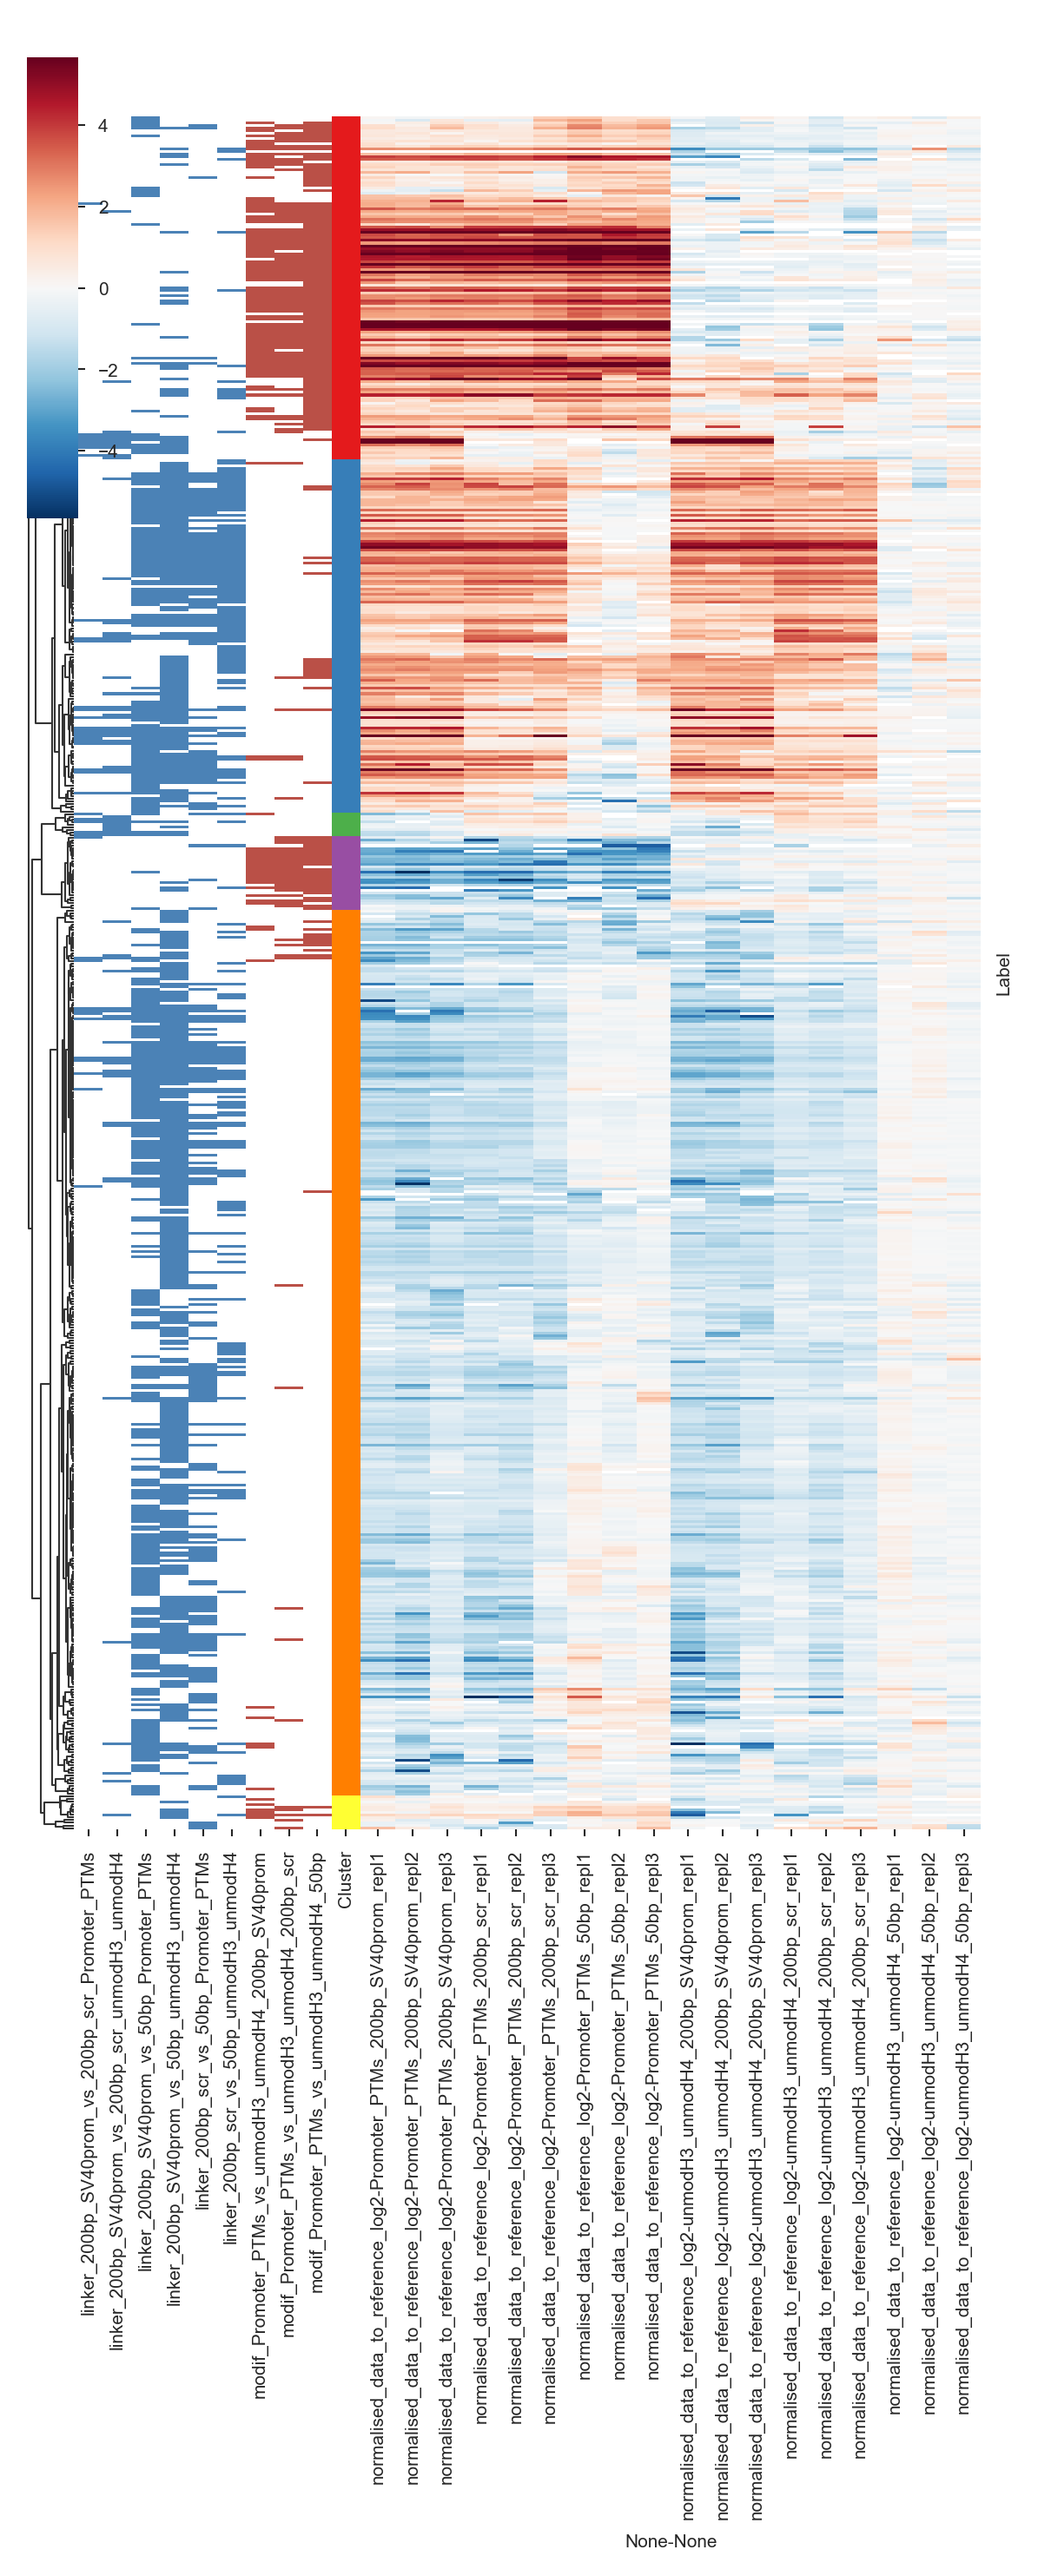

In [50]:

sns.clustermap(matrix_for_clustering, 
               mask=matrix_for_clustering_mask,
               row_linkage=linkage_rows,
               col_cluster=False,
               row_colors=row_colors, 
               yticklabels=False, 
               cmap='RdBu_r', 
               center=0,
               dendrogram_ratio=0.05,
               vmin=-cluster_vmin_vmax,
               vmax=+cluster_vmin_vmax,
               figsize=(FIVE_MM_IN_INCH*20, FIVE_MM_IN_INCH*50)
)

And now, prettier, stylised heatmaps

In [51]:
from seaborn.matrix import ClusterGrid
row_colors.values[linkage_rows_ind]

array([['#FFFFFF', '#FFFFFF', '#4B82B6', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ['#FFFFFF', '#FFFFFF', '#4B82B6', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ['#FFFFFF', '#FFFFFF', '#4B82B6', ..., '#FFFFFF', '#BA5047',
        '#e41a1c'],
       ...,
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#ffff33'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#ffff33'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#BA5047', '#FFFFFF',
        '#ffff33']], dtype=object)



Heatmap of protein responses to the long-linkers-prom experiments.
Proteins are plotted in rows, experiments in columns.
Heatmap on the left colour codes proteins that respond to
either linkers (blue) or modifications (red) in each of the experiments.
Only proteins that respond to any linker or modification are shown.

Clustering (ward) dendrograms are shown on the left or the bottom.
Colour scale represents log2 fold change normalised to mean control experiment.




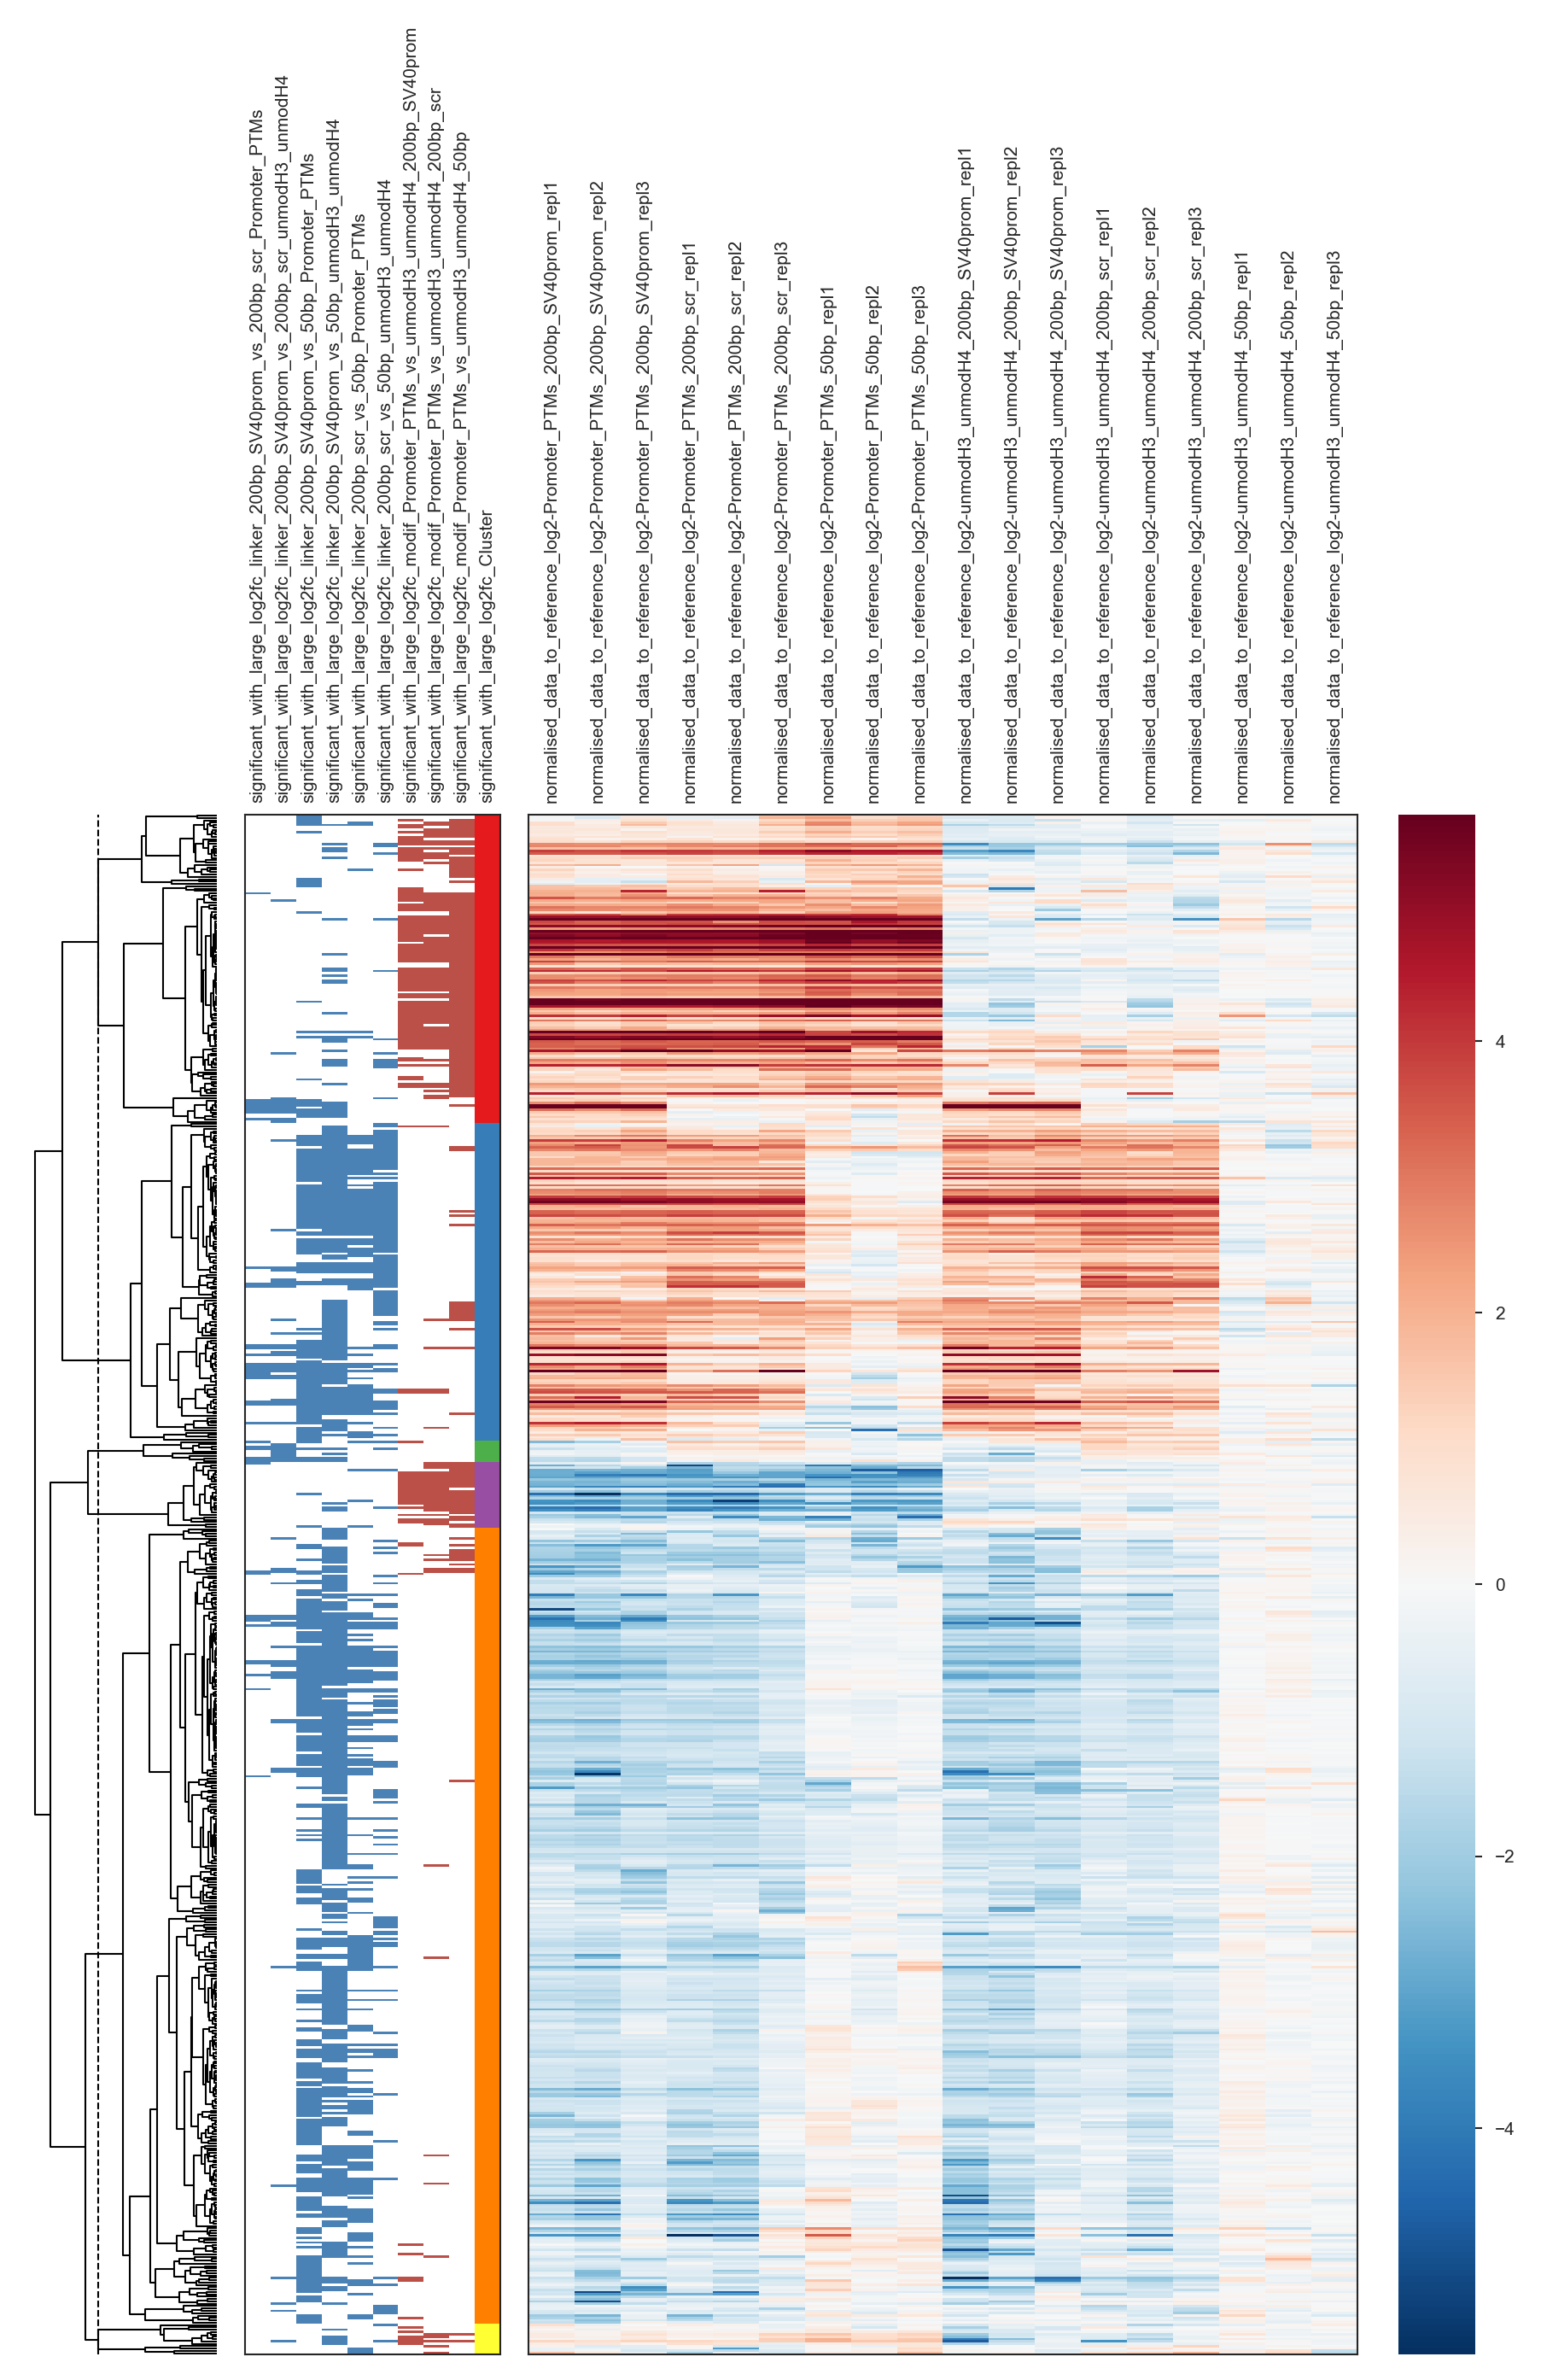

In [52]:
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(30*FIVE_MM_IN_INCH, 50*FIVE_MM_IN_INCH), constrained_layout=True)

gs = GridSpec(2, 3, 
              height_ratios=[0.9, 0.1], 
              width_ratios=[0.15, 0.2, 0.65],
              figure=fig,
              wspace=0.01,
              hspace=0.01,
             )


ax_heatmap = fig.add_subplot(gs[0, 2])
ax_colors_row = fig.add_subplot(gs[0, 1])
ax_dendrogram_row = fig.add_subplot(gs[0, 0])

sns.heatmap(
    matrix_for_clustering.loc[linkage_rows_order],
    cmap='RdBu_r',
    vmin=-cluster_vmin_vmax,
    vmax=cluster_vmin_vmax,
    ax=ax_heatmap,
    xticklabels=1,
    rasterized=True
)

hierarchy.dendrogram(linkage_rows, 
                     ax=ax_dendrogram_row, 
                     link_color_func=lambda x: 'black',
                     orientation='left',
                    )

ax_dendrogram_row.axvline(THRESHOLD, linestyle='--', color='k')

# sns.heatmap inverst axis, we should as well
ax_dendrogram_row.invert_yaxis()

row_color_matrix, row_color_cmap = ClusterGrid.color_list_to_matrix_and_cmap(
    row_colors.values.T, 
    linkage_rows_ind
)
sns.heatmap(row_color_matrix, ax=ax_colors_row, cmap=row_color_cmap, cbar=False, 
            xticklabels=[f'{SIGNIFICANT_COL}_{c}' for c in row_colors.columns], yticklabels=0)

for ax in [ax_heatmap, ax_colors_row]:
    ax.grid(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(True)
    ax.set_yticks([])
    ax.xaxis.tick_top()
    ax.xaxis.set_tick_params(length=0, rotation=90)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
for ax in [ax_dendrogram_row]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

_fname = OUTPUT_DIRECTORY / f'02-heatmap-{DATASET}.pdf'
_caption = f"""

Heatmap of protein responses to the {DATASET} experiments.
Proteins are plotted in rows, experiments in columns.
Heatmap on the left colour codes proteins that respond to
either linkers (blue) or modifications (red) in each of the experiments.
Only proteins that respond to any linker or modification are shown.

Clustering (ward) dendrograms are shown on the left or the bottom.
Colour scale represents log2 fold change normalised to mean control experiment.

"""
plt.savefig(_fname, bbox_inches='tight', dpi=DPI)
with open(str(_fname) + '.caption.md', 'w') as f:
    f.write(_caption)
    print(_caption)


    

In [53]:
excel_cluster = pd.DataFrame(cluster.copy())
excel_cluster.columns = pd.MultiIndex.from_tuples([('cluster_classification', 'cluster')])
excel_cluster

,cluster_classification
,cluster
Label,
MYH9,Not clustered
SPTAN1,Not clustered
PRKDC,Not clustered
SPTBN1,Cluster 6
ACTB,Not clustered
...,...
ADD1,Cluster 1
CCNK,Not clustered


In [54]:
cluster.value_counts()

Not clustered        905
Cluster 5            338
Cluster 2            135
Cluster 1            131
Insufficient data     41
Cluster 4             28
Cluster 6             13
Cluster 3              9
Name: Cluster, dtype: int64

## Writing Excel

In [55]:
import xlsxwriter
from seaborn.utils import relative_luminance

Collect everything in one place

In [56]:
excel_model_outputs_classification

model_classification                  
           modif_responsive linker_responsive
Label                                        
MYH9                  False             False
SPTAN1                False             False
PRKDC                 False             False
SPTBN1                 True             False
ACTB                  False             False
...                     ...               ...
ADD1                   True             False
CCNK                  False             False
DCAF13                False             False
YTHDF2                False             False
BAX                   False              True

[1600 rows x 2 columns]

In [57]:
cluster

Label
MYH9      Not clustered
SPTAN1    Not clustered
PRKDC     Not clustered
SPTBN1        Cluster 6
ACTB      Not clustered
              ...      
ADD1          Cluster 1
CCNK      Not clustered
DCAF13    Not clustered
YTHDF2    Not clustered
BAX           Cluster 5
Name: Cluster, Length: 1600, dtype: object

In [58]:
df_excel = excel_metadata.join(excel_cluster).join(excel_model_outputs_classification).join(excel_model_outputs_fc_estimates).join(excel_model_comment).join(excel_model_outputs_other).join(excel_model_coefficients).join(excel_normalised_data_reference).join(excel_normalised_data).join(excel_raw_data)
assert not df_excel.index.duplicated().any()
df_excel

metadata                    \
          Label Accession    Gene   
Label                               
MYH9       MYH9    P35579    MYH9   
SPTAN1   SPTAN1    Q13813  SPTAN1   
PRKDC     PRKDC    P78527   PRKDC   
SPTBN1   SPTBN1    Q01082  SPTBN1   
ACTB       ACTB    P60709    ACTB   
...         ...       ...     ...   
ADD1       ADD1    P35611    ADD1   
CCNK       CCNK    O75909    CCNK   
DCAF13   DCAF13    Q9NV06  DCAF13   
YTHDF2   YTHDF2    Q9Y5A9  YTHDF2   
BAX         BAX    Q07812     BAX   

                                                                        \
                                              Description # AAs # PSMs   
Label                                                                    
MYH9    Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...  1960   9223   
SPTAN1  Spectrin alpha chain, non-erythrocytic 1 OS=Ho...  2472   5575   
PRKDC   DNA-dependent protein kinase catalytic subunit...  4128   5822   
SPTBN1  Spectrin beta chain, non-erythrocytic 1 OS=Hom...  2364   4865   
ACTB    Actin, cytoplasmic 1 OS=Homo sapiens OX=9606 G...   375   4951   
...                                                   ...   ...    ...   
ADD1    Alpha-adducin OS=Homo sapiens OX=9606 GN=ADD1 ...   737      2   
CCNK    Cyclin-K OS=Homo sapiens OX=9606 GN=CCNK PE=1 ...   580      2   
DCAF13  DDB1- and CUL4-associated factor 13 OS=Homo sa...   445      2   
YTHDF2  YTH domain-containing family protein 2 OS=Homo...   579      2   
BAX     Apoptosis regulator BAX OS=Homo sapiens OX=960...   192      2   

                                                                           \
       # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                       
MYH9          158                                   158               137   
SPTAN1        203                                   203               201   
PRKDC         228                                   228               228   
SPTBN1        165                                   165               152   
ACTB           29                                    29                11   
...           ...                                   ...               ...   
ADD1            2                                     2                 2   
CCNK            2                                     2                 2   
DCAF13          2                                     2                 2   
YTHDF2          2                                     2                 2   
BAX             2                                     2                 2   

                     ...                 raw_data  \
       Coverage [%]  ... Promoter_PTMs_50bp_repl3   
Label                ...                            
MYH9             69  ...             2.199156e+09   
SPTAN1           77  ...             8.134845e+08   
PRKDC            55  ...             5.859108e+08   
SPTBN1           75  ...             1.151616e+09   
ACTB             82  ...             1.953446e+10   
...             ...  ...                      ...   
ADD1              4  ...             8.134650e+06   
CCNK              6  ...                      NaN   
DCAF13            6  ...                      NaN   
YTHDF2            5  ...             8.093759e+07   
BAX               6  ...             6.320914e+06   

                                             \
       unmodH3_unmodH4_200bp_SV40prom_repl1   
Label                                         
MYH9                           2.035759e+09   
SPTAN1                         7.448489e+08   
PRKDC                          6.159315e+08   
SPTBN1                         5.236452e+08   
ACTB                           1.792695e+10   
...                                     ...   
ADD1                           8.199420e+06   
CCNK                                    NaN   
DCAF13                         1.540931e+06   
YTHDF2                         9.358294e+07   
BAX               

Reorder the data as follows:

- Order clustered proteins by cluster order.
- Place insufficient data proteins after the cluster, ordered by P-value
- Place other proteins after these, ordered by P-value

In [59]:
_order = excel_model_outputs_other.loc(axis=1)[:,'P.Value'].min(axis=1).sort_values().index

excel_order = list(linkage_rows_order)
excel_order += [o for o in _order if cluster.get(o) == 'Insufficient data']
excel_order += [o for o in _order if cluster.get(o) == 'Not clustered']

assert set(excel_order) == set(data_metadata.index)

df_excel = df_excel.loc[excel_order]
df_excel

metadata                    \
          Label Accession    Gene   
Label                               
TPX2       TPX2    Q9ULW0    TPX2   
BCORL1   BCORL1    Q5H9F3  BCORL1   
SETD5     SETD5    Q9C0A6   SETD5   
PWWP2B   PWWP2B    Q6NUJ5  PWWP2B   
GAS2L3   GAS2L3    Q86XJ1  GAS2L3   
...         ...       ...     ...   
KRT3       KRT3    P12035    KRT3   
KRT31     KRT31    Q15323   KRT31   
ANXA1     ANXA1    P04083   ANXA1   
PRKACA   PRKACA    P17612  PRKACA   
ADD3       ADD3    Q9UEY8    ADD3   

                                                                        \
                                              Description # AAs # PSMs   
Label                                                                    
TPX2    Targeting protein for Xklp2 OS=Homo sapiens OX...   747     23   
BCORL1  BCL-6 corepressor-like protein 1 OS=Homo sapie...  1785    600   
SETD5   Histone-lysine N-methyltransferase SETD5 OS=Ho...  1442     10   
PWWP2B  PWWP domain-containing protein 2B OS=Homo sapi...   590      8   
GAS2L3  GAS2-like protein 3 OS=Homo sapiens OX=9606 GN...   694      5   
...                                                   ...   ...    ...   
KRT3    Keratin, type II cytoskeletal 3 OS=Homo sapien...   628    258   
KRT31   Keratin, type I cuticular Ha1 OS=Homo sapiens ...   416     96   
ANXA1   Annexin A1 OS=Homo sapiens OX=9606 GN=ANXA1 PE...   346      2   
PRKACA  cAMP-dependent protein kinase catalytic subuni...   351      3   
ADD3    Gamma-adducin OS=Homo sapiens OX=9606 GN=ADD3 ...   706      2   

                                                                           \
       # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                       
TPX2           10                                    10                10   
BCORL1         57                                    57                56   
SETD5           3                                     3                 3   
PWWP2B          5                                     5                 5   
GAS2L3          2                                     2                 2   
...           ...                                   ...               ...   
KRT3           16                                    16                 3   
KRT31           9                                     9                 2   
ANXA1           2                                     2                 2   
PRKACA          2                                     2                 2   
ADD3            2                                     2                 2   

                     ...                 raw_data  \
       Coverage [%]  ... Promoter_PTMs_50bp_repl3   
Label                ...                            
TPX2             14  ...             7.789370e+06   
BCORL1           40  ...             9.297918e+07   
SETD5             3  ...             3.950516e+06   
PWWP2B            8  ...             6.688192e+06   
GAS2L3            5  ...             2.142189e+07   
...             ...  ...                      ...   
KRT3             17  ...                      NaN   
KRT31            24  ...                      NaN   
ANXA1             8  ...                      NaN   
PRKACA            8  ...                      NaN   
ADD3              3  ...                      NaN   

                                             \
       unmodH3_unmodH4_200bp_SV40prom_repl1   
Label                                         
TPX2                           5.901518e+06   
BCORL1                         2.509175e+07   
SETD5                          1.404246e+06   
PWWP2B                                  NaN   
GAS2L3                         1.543627e+06   
...                                     ...   
KRT3                                    NaN   
KRT31                                   NaN   
ANXA1                                   NaN   
PRKACA                                  NaN   
ADD3              

In [60]:
from seaborn.utils import relative_luminance

In [61]:
output_xlsx = OUTPUT_DIRECTORY / f'01-model-results.{DATASET}.xlsx'
output_csv = OUTPUT_DIRECTORY / f'01-model-results.{DATASET}.csv.gz'

COLUMN_GROUPS = {
    'Metadata': excel_metadata.columns,
    'Classification': excel_model_outputs_classification.columns,
    'Log2(FC) estimates (incl. imputed)': list(excel_model_outputs_fc_estimates.columns),
    'Comment': list(excel_model_comment.columns),
}

GROUP_DEPTHS = {
    # 'Comment': 2, # Merging the two rows for the comment group makes excel file not sortable
}

for coef in MODEL_COEFS:
    COLUMN_GROUPS[f'Model outputs for {coef}'] = list(excel_model_outputs_other[[f'model_estimates_for_{coef}']].columns)

COLUMN_GROUPS = {
    **COLUMN_GROUPS,
    'Classification': list(excel_cluster) + list(excel_model_outputs_classification),
    'Model coefficient estimates': list(excel_model_coefficients),
    'Normalised data (to reference, log2)': list(excel_normalised_data_reference),
    'Normalised data (log2)': list(excel_normalised_data),
    'Raw data': list(excel_raw_data),
}

RENAMES = {}

for col in excel_model_outputs_fc_estimates.columns:
    RENAMES[col] = col[0].partition('model_estimates_for_')[2]
    
_simple_renames = []
_simple_renames.extend(excel_cluster.columns)
_simple_renames.extend(excel_model_outputs_classification.columns)
_simple_renames.extend(excel_metadata.columns)
_simple_renames.extend(excel_model_outputs_other.columns)
_simple_renames.extend(excel_model_coefficients.columns)
_simple_renames.extend(excel_normalised_data_reference.columns)
_simple_renames.extend(excel_normalised_data.columns)
_simple_renames.extend(excel_raw_data.columns)
_simple_renames.extend(excel_model_comment.columns)

for col in _simple_renames:
    RENAMES[col] = col[1]
    

writer = pd.ExcelWriter(output_xlsx, engine='xlsxwriter')
workbook = writer.book

bold = workbook.add_format({'bold': True})
bold_right = workbook.add_format({'bold': True, 'right': 1})

bold_rotated = workbook.add_format({'bold': True, 'rotation':90})
bold_rotated_right = workbook.add_format({'bold': True, 'rotation':90, 'right': 1})

merged_format = workbook.add_format({
    'bold': 1,
    'align': 'center',
    'valign': 'vcenter',
    'right': 1,
    'text_wrap': True,
})

right_border = workbook.add_format({
    'right': 1,
})

sheet_name = f"Summary"

first_data_row = 2
first_data_col = 0

# pandas does not support writing to Excel with multi-index and header=False
# so quickly remove the index, from the DF we're writing
# (it won't make a difference as we will handle header columns ourselves)
_df_excel_nomultiindex = df_excel.copy()
_df_excel_nomultiindex.columns = ['___'.join(map(str, c)) for c in df_excel.columns]
# Write this df as csv:
_df_excel_nomultiindex.to_csv(output_csv)
# And into excel
_df_excel_nomultiindex.to_excel(
    writer, 
    sheet_name=sheet_name, 
    startrow=first_data_row, 
    startcol=first_data_col, 
    index=False, 
    header=False
)

last_data_row = first_data_row + len(df_excel)
last_data_col = first_data_col + len(df_excel.columns)

worksheet = writer.sheets[sheet_name]

SEPARATOR_COLUMNS = {v[-1] for v in COLUMN_GROUPS.values()}

colname_to_index_map = {}
for i, col in enumerate(df_excel.columns, start=first_data_col):
    fmt_ = bold_rotated if not col in SEPARATOR_COLUMNS else bold_rotated_right
    
    worksheet.write(first_data_row-1, i, RENAMES.get(col, str(col)), fmt_)
    colname_to_index_map[col] = i

for merged_name, col_list in COLUMN_GROUPS.items():
    _first = colname_to_index_map[col_list[0]]
    _last = colname_to_index_map[col_list[-1]]
    
    rows_to_merge = GROUP_DEPTHS.get(merged_name, 1)
    
    if _first == _last and rows_to_merge == 1:
        # Cannot merge one column only
        worksheet.write(first_data_row-2, _first, merged_name, merged_format)
    else:
        worksheet.merge_range(
            first_data_row-2, colname_to_index_map[col_list[0]], 
            first_data_row-2+(rows_to_merge-1), colname_to_index_map[col_list[-1]],
            merged_name,
            merged_format
        )
        
for col in SEPARATOR_COLUMNS:
    worksheet.set_column(colname_to_index_map[col], colname_to_index_map[col], cell_format=right_border)

color_red = '#b2182b'
format_red = workbook.add_format({'bg_color': color_red})
color_red_lighter = '#f4a582'

color_white = '#f7f7f7'

color_blue = '#2166ac'
format_blue = workbook.add_format({'bg_color': color_blue})
color_blue_lighter = '#92c5de'
       
    
three_color_columns = list(COLUMN_GROUPS['Log2(FC) estimates (incl. imputed)'])
three_color_columns += [c for c in excel_model_outputs_other.columns if c[1] == 'logFC']

for col in three_color_columns:
    
    _limit = df_excel[col].abs().replace(np.inf, np.nan).quantile(0.98)
    print(f"Excel formatting limit for {col}: +/-{_limit}")
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': '3_color_scale',
            'min_type': 'num',
            'max_type': 'num',
            'mid_type': 'num',
            'min_value': -_limit,
            'max_value': _limit,
            'mid_value': 0,
            'max_color': color_red,
            'mid_color': color_white,
            'min_color': color_blue,

        }
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"inf"',
        'format': format_red}
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"-inf"',
        'format': format_blue}
    )
    
# Also use 3-colours for reference-normalised data but have joint limits

_limit_ref_norm = cluster_vmin_vmax

for col in excel_normalised_data_reference.columns:
    _limit = _limit_ref_norm
    print(f"Excel formatting limit for {col}: +/-{_limit}")

    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': '3_color_scale',
            'min_type': 'num',
            'max_type': 'num',
            'mid_type': 'num',
            'min_value': -_limit,
            'max_value': _limit,
            'mid_value': 0,
            'max_color': color_red,
            'mid_color': color_white,
            'min_color': color_blue,

        }
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"inf"',
        'format': format_red}
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"-inf"',
        'format': format_blue}
    )
    
databar_columns = list(COLUMN_GROUPS['Model coefficient estimates']) + list(excel_normalised_data.columns) + list(excel_raw_data.columns) 

for col in databar_columns:
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': 'data_bar',
            'min_type': 'percentile',
            'max_type': 'percentile',
            'min_value': 1,
            'max_value': 99,

        }
    )
    

boolean_columns_good = [c for c in excel_model_outputs_other.columns if c[1] in ['significant', 'significant_with_large_log2fc']]
boolean_columns_good += list(excel_model_outputs_classification.columns)

boolean_columns_bad = [c for c in excel_model_outputs_other.columns if c[1] in ['logFC_is_imputed', 'logFC_based_on_single_datapoint']]

bold_green = workbook.add_format({'bold': True, 'font_color': '#1b7837'})
bold_red = workbook.add_format({'bold': True, 'font_color': color_red})
for col in boolean_columns_good:
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': 'TRUE',
        'format': bold_green}
    )

for col in boolean_columns_bad:
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': 'TRUE',
        'format': bold_red}
    )
    
for col in excel_cluster.columns:
    
    for _clust, _color in cluster_palette.items():
        
        lum = relative_luminance(_color)
        text_color = "#000000" if lum > .408 else "#FFFFFF"
        fmt = workbook.add_format({'bold': True, 'bg_color': _color, 'font_color': text_color})
        
        worksheet.conditional_format(
            first_data_row, colname_to_index_map[col], 
            last_data_row, colname_to_index_map[col], 
            {'type': 'cell',
            'criteria': '==',
            'value': f'"{_clust}"',
            'format': fmt}
        )
    fmt = workbook.add_format({'bold': True, 'font_color': '#FF0000'})
        
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"Insufficient data"',
        'format': fmt}
    )  
    

# Narrow columns
narrow_columns = []
narrow_columns.extend([c for c in data_metadata if c[1] in ['# PSMs', '# Peptides', '# Unique Peptides', 'Coverage [%]']])
    
for col in narrow_columns:
    worksheet.set_column(colname_to_index_map[col], colname_to_index_map[col], 4)

worksheet.set_column(colname_to_index_map[('metadata', 'Description')], colname_to_index_map[('metadata', 'Description')], 40)
worksheet.set_column(colname_to_index_map[('model_estimates', 'comment')], colname_to_index_map[('model_estimates', 'comment')], 40)

worksheet.freeze_panes(first_data_row, colname_to_index_map[('metadata', 'Description')] + 1)
worksheet.autofilter(first_data_row-1, first_data_col, last_data_row, last_data_col)
      
writer.save()
print("Done!")

Excel formatting limit for ('model_estimates_for_linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs', 'logFC_imputed'): +/-1.7543604647017348
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4', 'logFC_imputed'): +/-2.1510029595709637
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40prom_vs_50bp_Promoter_PTMs', 'logFC_imputed'): +/-3.0676039771669985
Excel formatting limit for ('model_estimates_for_linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4', 'logFC_imputed'): +/-3.200658360337326
Excel formatting limit for ('model_estimates_for_linker_200bp_scr_vs_50bp_Promoter_PTMs', 'logFC_imputed'): +/-2.4336607804353285
Excel formatting limit for ('model_estimates_for_linker_200bp_scr_vs_50bp_unmodH3_unmodH4', 'logFC_imputed'): +/-2.687857676609186
Excel formatting limit for ('model_estimates_for_modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom', 'logFC_imputed'): +/-4.614747620456534
Excel formatting limit for ('model_estimat

Done!
